# **(b)**

繼承上題，所使用的model只使用5個features作為input，並代入sigmoid basis。再利用MAP的公式，觀察不同的lambda項造成的結果。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = pd.read_csv('data_X.csv').drop('Serial_id',axis=1)
y = pd.read_csv('data_T.csv').drop('Serial_id',axis=1)
x = (x-x.mean())/(x.std())
x = pd.concat([x,y],axis=1)
x = x.reindex(np.random.permutation(x.index))

In [26]:
x_train = x.iloc[:400,[0,1,4,5,6]]
x_valid = x.iloc[400:,[0,1,4,5,6]]
y_training = pd.DataFrame(x.iloc[:400,-1])
y_valid = pd.DataFrame(x.iloc[400:,-1])

In [15]:
def sigmoid_basisfunc(data):
    new_data = pd.DataFrame()
    for i in range(data.shape[1]):
        temp = pd.DataFrame(data.iloc[:,i]).applymap(lambda x:1/(1+np.exp(-x))) #輸入的data要先做好標準化才行
        new_data = pd.concat([new_data,temp],axis = 1) 
    return new_data #回傳已經代入sigmoid bisis的input

In [13]:
def Weight(x,y,Lambda=0):
    x = pd.concat([pd.Series(1,index=x.index,name = 'w0'),x],axis=1) #將輸入資料補上bias項
    x = x.to_numpy() #轉換成矩陣來運算
    temp = np.linalg.inv(np.eye(x.shape[1])*Lambda+np.dot(x.T,x))
    w = np.dot(np.dot(temp,x.T),y)
    return w

In [20]:
def RMS(x,y,w):
    x = pd.concat([pd.Series(1,index=x.index,name = 'w0'),x],axis=1) #將輸入資料補上bias項
    x = x.to_numpy() #轉換成矩陣來運算
    k = np.dot(x,w)
    p = k-y
    err = (p**2).iloc[:,0].sum()/(2*len(k))
    j = (err*2)**0.5
    return j

In [58]:
train_sigmoid = sigmoid_basisfunc(x_train)
valid_sigmoid = sigmoid_basisfunc(x_valid)

In [59]:
def DiffLambda(train_sigmoid,y_training,valid_sigmoid,y_valid,LambdaList):
  train_list = []
  valid_list = []
  for i in LambdaList:
    w = Weight(train_sigmoid,y_training,i)
    train_list.append(RMS(train_sigmoid,y_training,w))
    valid_list.append(RMS(valid_sigmoid,y_valid,w))
    print("lambda = {}\nTraining RMS = {}\nValid RMS = {}\n".format(i,RMS(train_sigmoid,y_training,w),RMS(valid_sigmoid,y_valid,w)))
  return train_list,valid_list


In [67]:
lambdalist = [0,0.01,0.1,1,10,30,]
T_rms,V_rms = DiffLambda(train_sigmoid,y_training,valid_sigmoid,y_valid,lambdalist)

lambda = 0
Training RMS = 0.060095462716651955
Valid RMS = 0.0637923030156136

lambda = 0.01
Training RMS = 0.06009549453581747
Valid RMS = 0.06379436516936092

lambda = 0.1
Training RMS = 0.060098488713130685
Valid RMS = 0.0638131403743131

lambda = 1
Training RMS = 0.060292080359305715
Valid RMS = 0.06399822861255183

lambda = 10
Training RMS = 0.06326414251877281
Valid RMS = 0.06478048329340885

lambda = 30
Training RMS = 0.06921288207599371
Valid RMS = 0.06719470721965735



Text(0, 0.5, 'RMS')

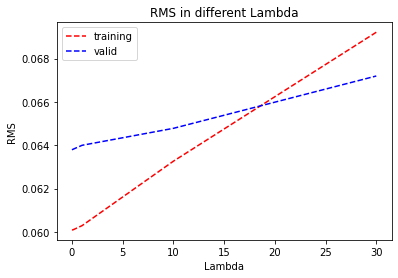

In [68]:
plt.figure()
plt.plot(lambdalist,T_rms,'r--',label = 'training')
plt.plot(lambdalist,V_rms,'b--',label = 'valid')
plt.title('RMS in different Lambda')
plt.legend(loc='best')
plt.xlabel('Lambda')
plt.ylabel('RMS')